### 성능평가

- 평가항목 방식 케이스
    - 지도학습의 분류
        - 혼동행렬(정확도, f1-score, 정밀도, 재현율), AUC, ROC
    - 지도학습의 회귀
        - 손실
    - 비지도학습
    - 강화학습



### 머신러닝 > 지도학습 > 분류 성능평가지표

- 통계학의 혼동행렬이라는 항목을 이용하여 평가
- 개요
    - 예측값이 실제 관측값을 얼마나 정확하게 예측하였는가?
    - 이 사항을 보여주는 행렬
    - 예
        - 양을 스스로 예측하였는데, 실제 양성인지 악성인지 예측하는 예
        - 실제는 병이 있었는데, 없다고 예측, 있다고 예측
        - 실제는 병이 없었는데, 있다고 예측, 없다고 예측
        
|구분|예측 : Positive|예측 : Negative|
|:--:|:--:|:--:|
|실제 : 예(Positive)|TP|FN|
|실제 : 아니오(Negative)|FP|TN|

                (True/False 는 맞췄는지를 나타냄)
                (Positive/Negative는 예측 값을 나타냄)

- TP : 참긍정
    - 병이 있다고 예측을 했고, 실제로 병이 있었다.
    - 긍정한것이 참이 되었다.
- TN : 참부정
    - 병이 없다고 예측을 했고, 실제로 병이 없었다.
    - 부정한것이 참이 되었다.
- FP : 거짓긍정
    - 병이 있다고 예측을 했지만, 실제로 병이 없었다.
    - 긍정한것이 거짓이 되었다.
    - 1형 오류
- FN : 거짓부정
    - 병이 없다고 예측을 했지만, 실제로 병이 있었다.
    - 부정한것이 거짓이 되었다.
    - 2형 오류

- 정밀도 (P Precision)
    - 병이 있다고 예측했는데, 실제로 병이 있는 비율, 정답율
    - P = TP/ (TP+FP)
- 재현율 (R Recall)
    - 실제로 병이 있는 전체 데이터중에 참긍정 비율
    - R = TP / (TP + FN)
- F1 점수
    - 정밀도와 재현율의 조화평균(Harmonic mean)
    - F1 = 2 / (1/P + 1/R)
- 특이성
    - 실제 병이 없는 전체 사람들중에 예측이 TN의 비율
    - TN / (TN + FP)
    - 1 - 거짓긍정비율
- 곡선하 면적(ROC) : Area under Curve ROC = ROC 곡선
    - 참 긍정률과 거짓 부정률 사이의 관계를 표현
    - 1 - 특이성
    - AUC : ROC의 상세값, 수치

#### 실제 데이터를 이용하여 성능평가를 수행
- 데이터 : 아이리스 활용

In [61]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [62]:
# 데이터 확인
ds = load_iris()
ds.data.shape

(150, 4)

In [63]:
ds.data[:1], ds.feature_names, ds.target_names, ds.target[:3], ds.target[-3:]

(array([[5.1, 3.5, 1.4, 0.2]]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([0, 0, 0]),
 array([2, 2, 2]))

In [64]:
ds.target.shape, ds.target_names.shape, type(ds.target_names)

((150,), (3,), numpy.ndarray)

In [65]:
ds.target_names[0], ds.target_names[1], ds.target_names[2]

('setosa', 'versicolor', 'virginica')

In [66]:
ds.target_names[ds.target][:2]

array(['setosa', 'setosa'], dtype='<U10')

In [73]:
# 아이리스 데이터 로드
def attach_iris():
    ds = load_iris()
    df = pd.DataFrame( ds.data, columns=ds.feature_names )
    # species라는 컬럼을 추가한다 => 값은 setosa, versicolor, virginica중 하나로 설정
    df['species'] = ds.target_names[ ds.target ]
#     df['species'] = ds.target    #0,1 버전
    return df  #DataFrame

df = attach_iris()#.head(2)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


#### 분류 알고리즘을 다양하게 사용하여 성능평가 수행
- 하이퍼파라미터 튜닝 + 파이프 라인?
- 각각 알고리즘별로 적용하여 시각화 및 수치 비교?(사용)

In [68]:
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [69]:
# 알고리즘
# 향후 알고리즘에 대한 이해와 데이터의 적합성에 대한 식견이 좀 더 보완된다면
# 알고리즘 후보들을 좀 더 적합하게 추릴 수 있을 것이다.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [70]:
# 알고리즘 시각화를 위해 사전 설정
# 선형 그래프의 모양을 지정
# 파라미터값은 임의 부여
class_map = {
    'LogisticRegression':('-', LogisticRegression()),
    'DecisionTreeClassifier':('--',DecisionTreeClassifier(max_depth=5)),
    'RandomForestClassifier':('.-',RandomForestClassifier(max_depth=5,
                                   n_estimators=10, max_features=1)),
    'GaussianNB':(':', GaussianNB()),
}

In [71]:
# 딕셔너리 key, value 확인
for key, value in class_map.items():
    print( key, value )

LogisticRegression ('-', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False))
DecisionTreeClassifier ('--', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'))
RandomForestClassifier ('.-', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=1, max_leaf_nodes=None,
                       min_impurity_d

In [74]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [75]:
# 데이터 정리
X = df[ df.columns[:4] ]
X.shape

(150, 4)

In [76]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [77]:
# 특정 종에 대해서 정답을 구축
Y = df['species'] == 'versicolor'
type(Y), Y[:2]

(pandas.core.series.Series, 0    False
 1    False
 Name: species, dtype: bool)

In [78]:
# 훈련용, 테스트용 데이터 분류
# 데이터가 작아서 결과물의 변별력을 높이고자 임의로 80%로 테스트 데이터를 높였다
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.8 )

In [79]:
X_train.shape, X_test.shape, Y_train.shape

((30, 4), (120, 4), (30,))

In [80]:
Y_test.shape, type(Y_test)

((120,), pandas.core.series.Series)

LogisticRegression : 0.7366621067031464
DecisionTreeClassifier : 0.9062927496580028
RandomForestClassifier : 0.9844391244870042
GaussianNB : 0.978454172366621


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


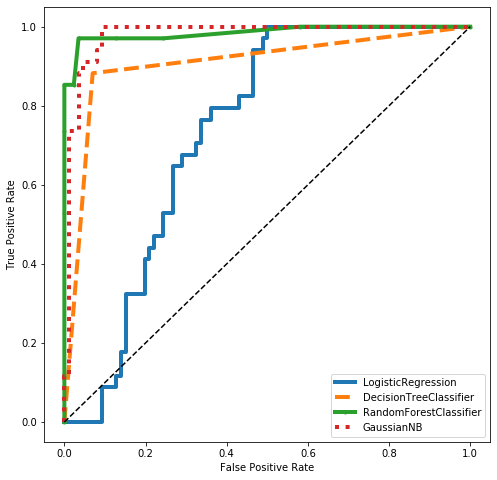

In [82]:
class_map = {
    'LogisticRegression':('-', LogisticRegression()),
    'DecisionTreeClassifier':('--', DecisionTreeClassifier(max_depth=5)),
    'RandomForestClassifier':('.-', RandomForestClassifier(max_depth=5, 
                                    n_estimators=10, max_features=1)),
    'GaussianNB':(':', GaussianNB()),
}


# 시각화를 통해서 성능 확인 (ROC, AUC)
plt.figure( figsize=(8,8) )

# 반복하여 시각화 처리 
for name, (lineStyle, model) in class_map.items():
    # 학습
    model.fit( X_train, Y_train )
    # 예측
    # predict_proba() : 예측에 대한 확률로 예측
    # 0, 1중에 1이 될 확률이 0.57%이다 => 1을 더 많이 예측하는 모델
    preds = model.predict_proba( X_test )
    #print( preds.shape, type(preds), preds[0, 1] )
    # preds => Series 타입으로 설정 : roc_curve() 함수 형식에 맞추기 위해서 예측답추출    
    pred  = pd.Series( preds[:, 1] )
    # ROC 값 획득    
    # roc 리턴값 
    # fpr : 거짓 양성비 : x축
    # tpr : 참 양성비 : y축
    # _ : 임계값, tpr가 fpr을 계산할때(내부에서) 사용한 결정함수의 임계값:이해
    fpr, tpr, _ = roc_curve( Y_test, pred )
    # ROC 드로잉    
    # AUC 표시 -> 수치!!
    auc_score = auc( fpr, tpr )
    print( '%s : %s' % (name, auc_score) )
    # 선 그리기
    plt.plot( fpr, tpr, lineStyle, linewidth=4, label=name )
    pass

# 시각화 마무리
plt.legend() # 범례 표시
plt.plot( [0,1], [0,1], 'k--' ) # 대각선
plt.xlabel('False Positive Rate')   # x 축의 이름
plt.ylabel('True Positive Rate')    # y 축의 이름
plt.show()   # 표시

In [ ]:
# 주석없는 버전

class_map = {
    'LogisticRegression':('-', LogisticRegression()),
    'DecisionTreeClassifier':('--', DecisionTreeClassifier(max_depth=5)),
    'RandomForestClassifier':('.-', RandomForestClassifier(max_depth=5, 
                                    n_estimators=10, max_features=1)),
    'GaussianNB':(':', GaussianNB()),
}
plt.figure( figsize=(8,8) )
for name, (lineStyle, model) in class_map.items():
    model.fit( X_train, Y_train )
    preds = model.predict_proba( X_test )
    pred  = pd.Series( preds[:, 1] )
    fpr, tpr, _ = roc_curve( Y_test, pred )
    auc_score = auc( fpr, tpr )
    print( '%s : %s' % (name, auc_score) )
    plt.plot( fpr, tpr, lineStyle, linewidth=4, label=name )
    pass

plt.legend()
plt.plot( [0,1], [0,1], 'k--' )
plt.show()

In [ ]:
#